In [1]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
dynamodb = boto3.resource('dynamodb', region_name='ap-northeast-1')
table = dynamodb.Table('dynamodb-env-keisuke-nakata')
ret = table.scan()
df = pd.DataFrame(data=ret['Items'])
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

In [3]:
df.head()

,date,ambient,co2_ndir,co2_pas,humidity,address,voc,temperature,dust,room
0,2021-11-01 12:53:27,430,5000,586,43.5333251953125,85:a5:ca:78:5c:a4,86,26.430206298828125,0,NaN
1,2021-11-01 12:54:06,430,5000,586,43.5333251953125,85:a5:ca:78:5c:a4,87,26.430206298828125,0,NaN
2,2021-11-01 12:54:38,444,5000,586,43.5333251953125,85:a5:ca:78:5c:a4,98,26.430206298828125,0,NaN
3,2021-11-01 12:55:11,444,5000,586,43.5333251953125,85:a5:ca:78:5c:a4,93,26.430206298828125,0,NaN
4,2021-11-01 12:55:43,463,5000,586,43.5333251953125,85:a5:ca:78:5c:a4,94,26.430206298828125,0,NaN


In [4]:
def show_graph(df):
    plt.figure(figsize=(24, 8))

    plt.subplot(6,1,1)
    plt.title('ambient', fontsize=14)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H")) 
    plt.ylim(-10, 600)
    plt.plot(df['date'], df['ambient'])

    plt.subplot(6,1,2)
    plt.title('temperature', fontsize=14)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H")) 
    plt.ylim(15, 30)
    plt.plot(df['date'], df['temperature'])
    
    plt.subplot(6,1,3)
    plt.title('humidity', fontsize=14)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H")) 
    plt.ylim(0, 100)
    plt.plot(df['date'], df['humidity'])    
    

    plt.figure(figsize=(24, 12))    
    
    plt.subplot(6,1,4)
    plt.title('co2', fontsize=14)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H")) 
    plt.ylim(400, 1600)
    plt.plot(df['date'], df['co2_pas'], label='co2(pas)')
    plt.plot(df['date'], df['co2_ndir'], label='co2(ndir)')
    plt.legend()
    
    plt.subplot(6,1,5)
    plt.title('voc', fontsize=14)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H")) 
    plt.ylim(0, 300)
    plt.plot(df['date'], df['voc'])
    
    plt.subplot(6,1,6)
    plt.title('ppm2.5', fontsize=14)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H")) 
    plt.ylim(0, 1)
    plt.plot(df['date'], df['dust'])

# 隔離部屋(仕事部屋)

In [5]:
df_work = df[df['room'] == 'work']
df_work = df[df['date'] >= '2021-11-03 00:00:00']
df_work.head()

,date,ambient,co2_ndir,co2_pas,humidity,address,voc,temperature,dust,room
1701,2021-11-03 00:00:50,129,581,781,45.025634765625,85:a5:ca:78:5c:a4,115,22.584991455078125,0.49658461219263356,work
1702,2021-11-03 00:02:06,130,581,779,45.0347900390625,85:a5:ca:78:5c:a4,114,22.499542236328125,0.4883557482955208,work
1703,2021-11-03 00:03:22,130,587,780,45.1141357421875,85:a5:ca:78:5c:a4,112,22.454147338867188,0.48919215291687906,work
1704,2021-11-03 00:04:38,128,587,775,45.04852294921875,85:a5:ca:78:5c:a4,112,22.488861083984375,0.47594525534249116,work
1705,2021-11-03 00:05:54,128,589,773,45.05767822265625,85:a5:ca:78:5c:a4,112,22.462158203125,0.4827421137238338,work


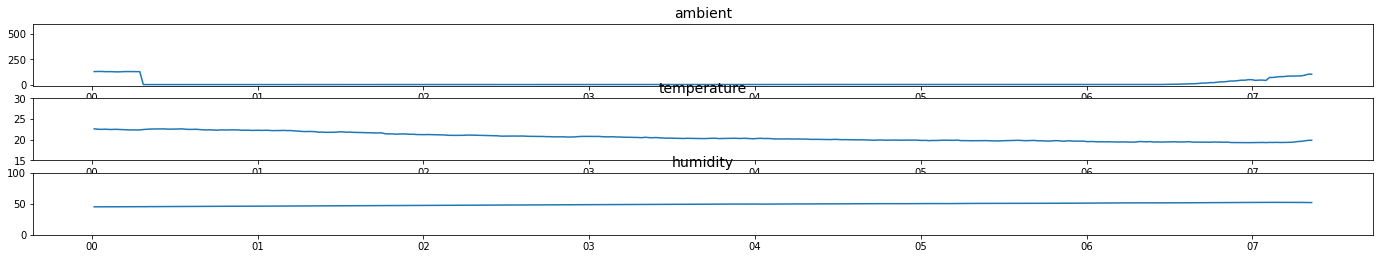

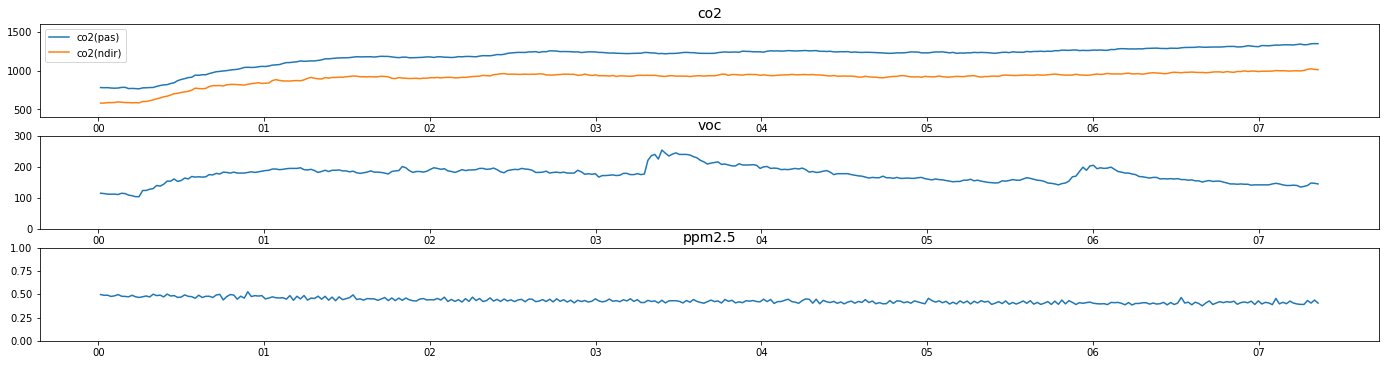

In [6]:
show_graph(df_work)

# リビング

# トイレ